<a href="https://colab.research.google.com/github/prajwalmadankar0/Stock-Price-Prediction/blob/main/EUR_USD_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from sklearn import metrics
from  pandas_datareader import data as pdr
import plotly.graph_objects as go
import matplotlib.dates as mpl_dates

from keras.callbacks import EarlyStopping


import sklearn
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
from sklearn.model_selection import GridSearchCV, train_test_split

import xgboost
from xgboost import XGBRegressor, DMatrix

In [ ]:
import yfinance as yf
import pandas as pd

def get_historical_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

def save_to_csv(data, filename):
    data.to_csv(filename)

if __name__ == "__main__":
    ticker = "EURUSD=X"  # Yahoo Finance ticker symbol for EUR/USD
    start_date = "2003-12-01"
    end_date = "2023-08-01"

    historical_data = get_historical_data(ticker, start_date, end_date)
    if not historical_data.empty:
        ohlc_data = historical_data[['Open', 'High', 'Low', 'Close']]
        save_to_csv(ohlc_data, "EUR_USD_OHLC_historical_data.csv")
        print("Data saved successfully to CSV.")
    else:
        print("No data found.")


[*********************100%***********************]  1 of 1 completed
Data saved successfully to CSV.


In [ ]:
data=pd.read_csv('/content/EUR_USD_OHLC_historical_data.csv')

In [ ]:
data.head(5)

,Date,Open,High,Low,Close
0,2003-12-01,1.203398,1.204007,1.194401,1.196501
1,2003-12-02,1.196101,1.210903,1.194600,1.208897
2,2003-12-03,1.209000,1.213003,1.207700,1.212298
3,2003-12-04,1.212004,1.214403,1.204398,1.208094
4,2003-12-05,1.207802,1.219096,1.206593,1.218695


import numpy as np
from google.colab import autoviz
df_2692338378830481061 = autoviz.get_df('df_2692338378830481061')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2692338378830481061, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6124465598694694902 = autoviz.get_df('df_6124465598694694902')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6124465598694694902, *['High'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2600184003933090772 = autoviz.get_df('df_2600184003933090772')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2600184003933090772, *['Low'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6172572300061385817 = autoviz.get_df('df_6172572300061385817')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6172572300061385817, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6023407355622021584 = autoviz.get_df('df_6023407355622021584')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6023407355622021584, *['Open'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7946590891211549974 = autoviz.get_df('df_7946590891211549974')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7946590891211549974, *['High'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6204207810074429115 = autoviz.get_df('df_6204207810074429115')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6204207810074429115, *['Low'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8521573893184351674 = autoviz.get_df('df_8521573893184351674')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8521573893184351674, *['Close'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4155957098607376713 = autoviz.get_df('df_4155957098607376713')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_4155957098607376713, *[[['Open', 'High'], ['High', 'Low'], ['Low', 'Close']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_1974140276871711591 = autoviz.get_df('df_1974140276871711591')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_1974140276871711591, *['Date', 'Open', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_2638285893303420747 = autoviz.get_df('df_2638285893303420747')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2638285893303420747, *['Date', 'Low', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_6843968579587301190 = autoviz.get_df('df_6843968579587301190')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6843968579587301190, *['Date', 'Close', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_4116422121092703521 = autoviz.get_df('df_4116422121092703521')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4116422121092703521, *['Date', 'count()', None], **{})
chart

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5102 entries, 0 to 5101
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5102 non-null   object 
 1   Open    5102 non-null   float64
 2   High    5102 non-null   float64
 3   Low     5102 non-null   float64
 4   Close   5102 non-null   float64
dtypes: float64(4), object(1)
memory usage: 199.4+ KB


Text(0, 0.5, 'Stock Price')

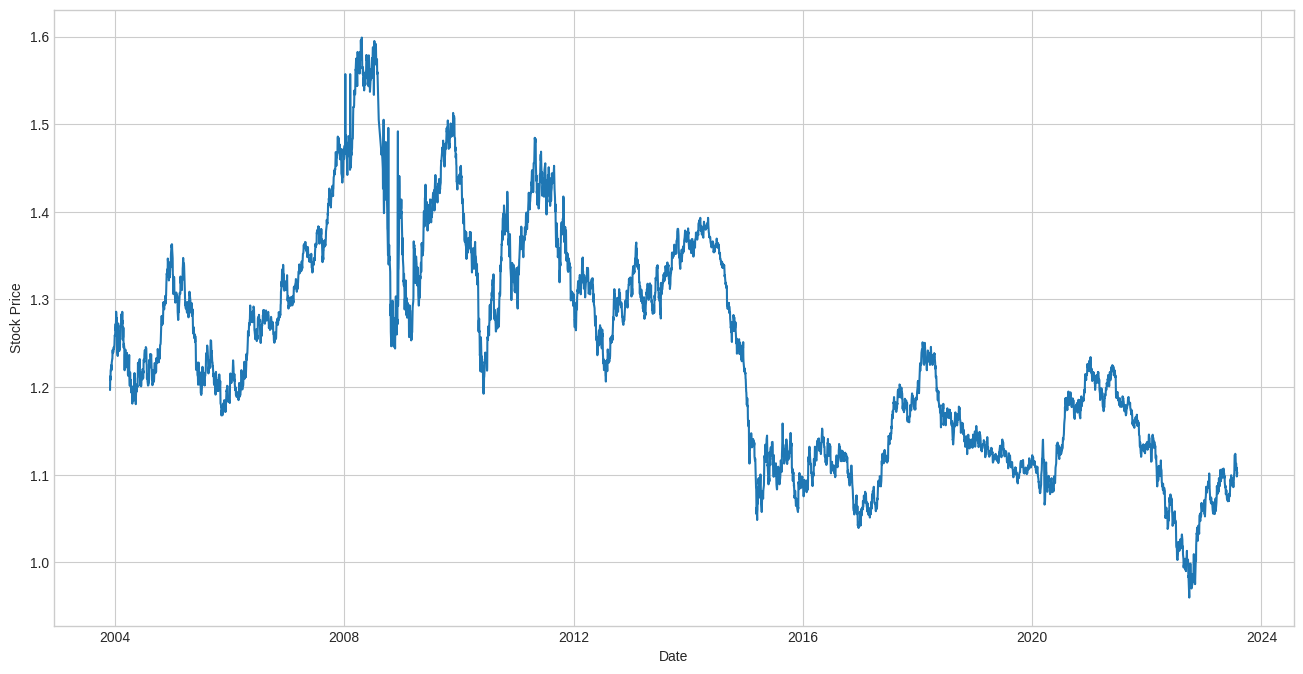

In [ ]:
data['Date']=pd.to_datetime(data.Date,format="%Y-%m-%d")
data.index=data['Date']

plt.figure(figsize=(16,8))
plt.plot(data["Close"],label='Close Price history')
plt.xlabel('Date')
plt.ylabel('Stock Price')

Text(0, 0.5, 'Stock Price Open History')

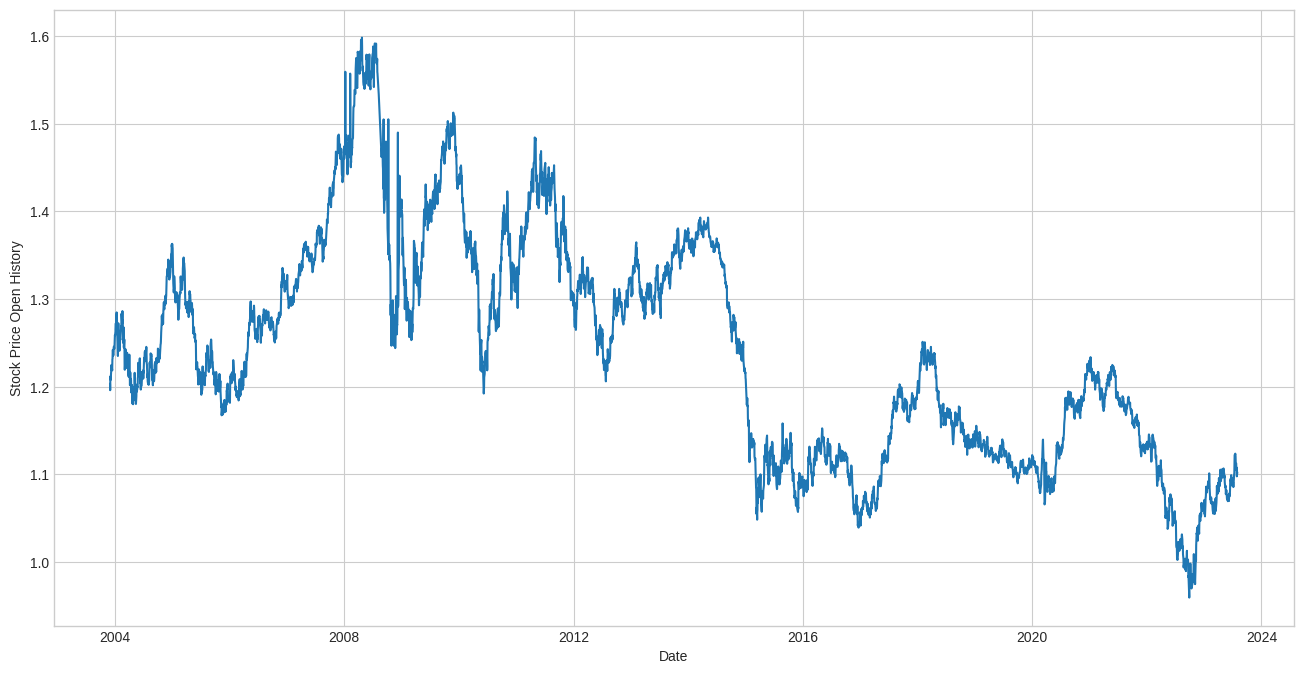

In [ ]:
data['Date']=pd.to_datetime(data.Date,format="%Y-%m-%d")
data.index=data['Date']

plt.figure(figsize=(16,8))
plt.plot(data["Open"],label='Open Price history')
plt.xlabel('Date')
plt.ylabel('Stock Price Open History')

In [ ]:
df = pd.read_csv('/content/EUR_USD_OHLC_historical_data.csv')

fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'], high=data['High'],
                low=data['Low'], close=data['Close'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [ ]:
'''
# Create the features and target variables
features = data[["Open", "High", "Low", "Close"]]
target = data["Close"]
'''

'\n# Create the features and target variables\nfeatures = data[["Open", "High", "Low", "Close"]]\ntarget = data["Close"]\n'

In [ ]:
def generate_features(df):
    """ Generate features for a stock/index/currency/commodity based on historical price and performance
    Args:
        df (dataframe with columns "open", "close", "high", "low", "volume")
    Returns:
        dataframe, data set with new features
    """
    df_new = pd.DataFrame()

    # 6 original features
    df_new['Open'] = df['Open']
    df_new['Open_1'] = df['Open'].shift(1)
    df_new['Close_1'] = df['Close'].shift(1)
    df_new['High_1'] = df['High'].shift(1)
    df_new['Low_1'] = df['Low'].shift(1)


    # 50 original features
    # average price
    df_new['avg_price_5'] = df['Close'].rolling(window=5).mean().shift(1)
    df_new['avg_price_30'] = df['Close'].rolling(window=21).mean().shift(1)
    df_new['avg_price_90'] = df['Close'].rolling(window=63).mean().shift(1)
    df_new['avg_price_365'] = df['Close'].rolling(window=252).mean().shift(1)

    # average price ratio
    df_new['ratio_avg_price_5_30'] = df_new['avg_price_5'] / df_new['avg_price_30']
    df_new['ratio_avg_price_905_'] = df_new['avg_price_5'] / df_new['avg_price_90']
    df_new['ratio_avg_price_5_365'] = df_new['avg_price_5'] / df_new['avg_price_365']
    df_new['ratio_avg_price_30_90'] = df_new['avg_price_30'] / df_new['avg_price_90']
    df_new['ratio_avg_price_30_365'] = df_new['avg_price_30'] / df_new['avg_price_365']
    df_new['ratio_avg_price_90_365'] = df_new['avg_price_90'] / df_new['avg_price_365']


    # standard deviation of prices
    df_new['std_price_5'] = df['Close'].rolling(window=5).std().shift(1)
    df_new['std_price_30'] = df['Close'].rolling(window=21).std().shift(1)
    df_new['std_price_90'] = df['Close'].rolling(window=63).std().shift(1)
    df_new['std_price_365'] = df['Close'].rolling(window=252).std().shift(1)

    # standard deviation ratio of prices
    df_new['ratio_std_price_5_30'] = df_new['std_price_5'] / df_new['std_price_30']
    df_new['ratio_std_price_5_90'] = df_new['std_price_5'] / df_new['std_price_90']
    df_new['ratio_std_price_5_365'] = df_new['std_price_5'] / df_new['std_price_365']
    df_new['ratio_std_price_30_90'] = df_new['std_price_30'] / df_new['std_price_90']
    df_new['ratio_std_price_30_365'] = df_new['std_price_30'] / df_new['std_price_365']
    df_new['ratio_std_price_90_365'] = df_new['std_price_90'] / df_new['std_price_365']


    # return
    df_new['return_1'] = ((df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)).shift(1)
    df_new['return_5'] = ((df['Close'] - df['Close'].shift(5)) / df['Close'].shift(5)).shift(1)
    df_new['return_30'] = ((df['Close'] - df['Close'].shift(21)) / df['Close'].shift(21)).shift(1)
    df_new['return_90'] = ((df['Close'] - df['Close'].shift(63)) / df['Close'].shift(63)).shift(1)
    df_new['return_365'] = ((df['Close'] - df['Close'].shift(252)) / df['Close'].shift(252)).shift(1)

    #average of return
    df_new['moving_avg_5'] = df_new['return_1'].rolling(window=5).mean()
    df_new['moving_avg_30'] = df_new['return_1'].rolling(window=21).mean()
    df_new['moving_avg_30'] = df_new['return_1'].rolling(window=63).mean()
    df_new['moving_avg_365'] = df_new['return_1'].rolling(window=252).mean()

    # the target
    df_new['Close'] = df['Close']
    df_new = df_new.dropna(axis=0)
    return df_new

data = generate_features(data)

In [ ]:
data.head()

,Open,Open_1,Close_1,High_1,Low_1,avg_price_5,avg_price_30,avg_price_90,avg_price_365,ratio_avg_price_5_30,...,ratio_std_price_90_365,return_1,return_5,return_30,return_90,return_365,moving_avg_5,moving_avg_30,moving_avg_365,Close
Date,,,,,,,,,,,,,,,,,,,,,
2004-11-19,1.294800,1.303798,1.294901,1.307292,1.294398,1.297178,1.283604,1.244797,1.232100,1.010574,...,1.114490,-0.006824,0.003017,0.034354,0.050890,0.082239,0.000614,0.000802,0.000337,1.303900
2004-11-22,1.302592,1.294800,1.303900,1.306404,1.294197,1.298558,1.285795,1.246205,1.232477,1.009926,...,1.124761,0.006950,0.005320,0.036574,0.072992,0.078586,0.001075,0.001131,0.000323,1.304002
2004-11-23,1.304206,1.302592,1.304002,1.305193,1.301693,1.300559,1.287795,1.247726,1.232840,1.009911,...,1.127413,0.000078,0.007733,0.033278,0.079296,0.075645,0.001554,0.001224,0.000312,1.309706
2004-11-24,1.309998,1.304206,1.309706,1.310307,1.297993,1.303261,1.289729,1.249331,1.233244,1.010493,...,1.131856,0.004374,0.010425,0.031996,0.083651,0.084109,0.002089,0.001288,0.000343,1.317801
2004-11-25,1.318096,1.309998,1.317801,1.319105,1.308695,1.306062,1.291476,1.251043,1.233637,1.011294,...,1.138419,0.006180,0.010740,0.028649,0.089176,0.081321,0.002152,0.001369,0.000333,1.325803


In [ ]:
data.describe()

,Open,Open_1,Close_1,High_1,Low_1,avg_price_5,avg_price_30,avg_price_90,avg_price_365,ratio_avg_price_5_30,...,ratio_std_price_90_365,return_1,return_5,return_30,return_90,return_365,moving_avg_5,moving_avg_30,moving_avg_365,Close
count,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000,...,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000,4849.000000,4.849000e+03,4849.000000,4849.000000
mean,1.240556,1.240597,1.240605,1.245191,1.235553,1.240685,1.240975,1.241651,1.244629,0.999781,...,0.512458,-0.000009,-0.000075,-0.000291,-0.000655,-0.004162,-0.000007,-5.651536e-07,-0.000006,1.240565
std,0.129048,0.129036,0.129028,0.129760,0.129455,0.128782,0.128137,0.126237,0.116213,0.011481,...,0.243793,0.007269,0.013332,0.026476,0.045097,0.087215,0.002677,7.195068e-04,0.000347,0.129041
min,0.959619,0.959619,0.959619,0.967006,0.072902,0.968951,0.977133,0.991316,1.039893,0.945349,...,0.150299,-0.133526,-0.101166,-0.151236,-0.206367,-0.239474,-0.020386,-3.400239e-03,-0.001072,0.959619
25%,1.127599,1.127612,1.127701,1.131606,1.123601,1.127355,1.126299,1.124083,1.135034,0.993282,...,0.337355,-0.003270,-0.007274,-0.015368,-0.026603,-0.067742,-0.001449,-4.113421e-04,-0.000247,1.127650
50%,1.228003,1.228034,1.228049,1.233350,1.224005,1.228995,1.230519,1.232558,1.244437,1.000115,...,0.451450,0.000000,0.000000,-0.000178,0.000959,-0.002622,0.000015,3.450568e-05,0.000010,1.228003
75%,1.336577,1.336577,1.336505,1.341202,1.331505,1.336901,1.334953,1.332236,1.343312,1.006706,...,0.644291,0.003232,0.007452,0.015716,0.027792,0.061817,0.001497,4.697655e-04,0.000254,1.336505
max,1.598184,1.598184,1.598798,1.602821,1.587402,1.589879,1.578920,1.565087,1.500027,1.061568,...,1.425349,0.173079,0.184059,0.173348,0.140425,0.217656,0.036492,2.128758e-03,0.000876,1.598798


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4849 entries, 2004-11-19 to 2023-07-31
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Open                    4849 non-null   float64
 1   Open_1                  4849 non-null   float64
 2   Close_1                 4849 non-null   float64
 3   High_1                  4849 non-null   float64
 4   Low_1                   4849 non-null   float64
 5   avg_price_5             4849 non-null   float64
 6   avg_price_30            4849 non-null   float64
 7   avg_price_90            4849 non-null   float64
 8   avg_price_365           4849 non-null   float64
 9   ratio_avg_price_5_30    4849 non-null   float64
 10  ratio_avg_price_905_    4849 non-null   float64
 11  ratio_avg_price_5_365   4849 non-null   float64
 12  ratio_avg_price_30_90   4849 non-null   float64
 13  ratio_avg_price_30_365  4849 non-null   float64
 14  ratio_avg_price_90_365

<Axes: >

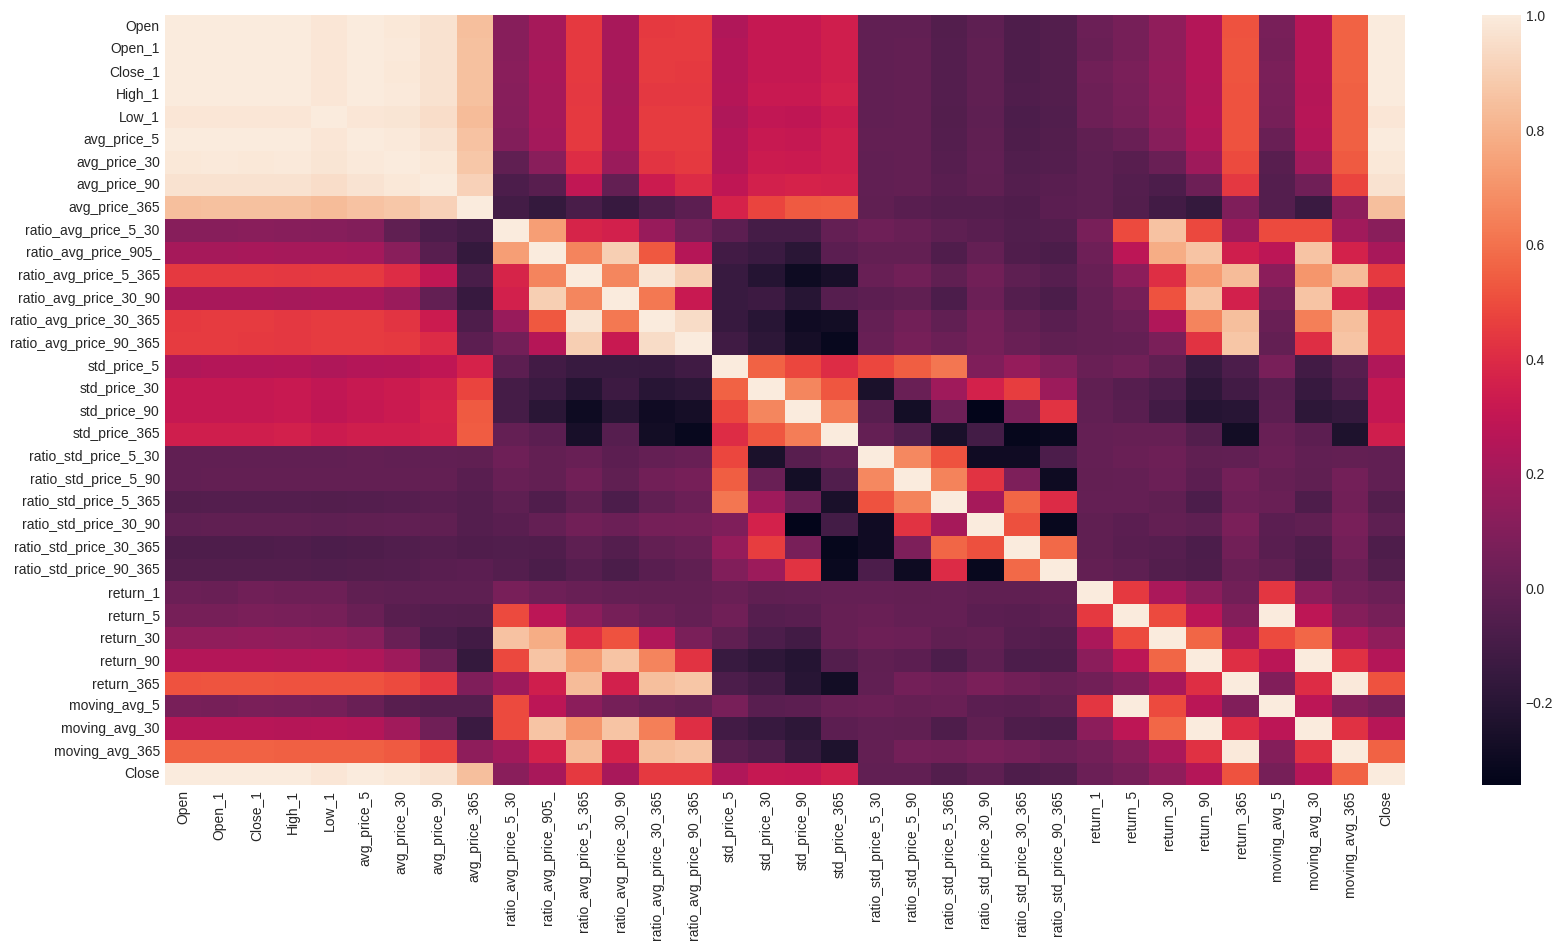

In [ ]:
import seaborn as sns
sns.heatmap(data.corr())

In [ ]:
#import datetime module
import datetime

#segregate data for training
start_train = datetime.datetime(2003, 12, 1,0,0)
end_train = datetime.datetime(2017, 12, 31, 0, 0)
data_train = data.loc[start_train:end_train]
data_train.describe()

,Open,Open_1,Close_1,High_1,Low_1,avg_price_5,avg_price_30,avg_price_90,avg_price_365,ratio_avg_price_5_30,...,ratio_std_price_90_365,return_1,return_5,return_30,return_90,return_365,moving_avg_5,moving_avg_30,moving_avg_365,Close
count,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,...,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000
mean,1.287657,1.287690,1.287688,1.292793,1.281992,1.287753,1.288000,1.288427,1.290441,0.999828,...,0.512326,0.000006,-0.000026,-0.000074,0.000205,-0.002143,0.000007,0.000017,0.000008,1.287658
std,0.122020,0.122009,0.122009,0.122525,0.123401,0.121688,0.120854,0.118568,0.106574,0.012537,...,0.224854,0.008153,0.014433,0.028977,0.048845,0.091199,0.002901,0.000781,0.000362,0.122019
min,1.039393,1.039393,1.039047,1.041992,0.072902,1.041875,1.048554,1.059122,1.088972,0.945349,...,0.162754,-0.133526,-0.101166,-0.151236,-0.206367,-0.239474,-0.020386,-0.003400,-0.001072,1.039047
25%,1.197103,1.197117,1.197418,1.202993,1.193602,1.198484,1.201900,1.204649,1.231661,0.992483,...,0.341054,-0.003508,-0.007943,-0.016378,-0.028227,-0.073155,-0.001580,-0.000431,-0.000256,1.197404
50%,1.301397,1.301406,1.301329,1.306259,1.295706,1.301802,1.302310,1.307144,1.307552,1.000370,...,0.461483,0.000000,0.000163,0.000633,0.005219,0.006644,0.000054,0.000112,0.000054,1.301329
75%,1.363666,1.363666,1.363768,1.368701,1.359193,1.363423,1.362903,1.361323,1.364553,1.007935,...,0.653000,0.003535,0.008473,0.017941,0.032876,0.064261,0.001705,0.000544,0.000265,1.363768
max,1.598184,1.598184,1.598798,1.602821,1.587402,1.589879,1.578920,1.565087,1.500027,1.061568,...,1.345655,0.173079,0.184059,0.173348,0.140425,0.217656,0.036492,0.002129,0.000876,1.598798


In [ ]:
#segregate data for validation
start_test = datetime.datetime(2018, 1, 1, 0, 0)
end_test = datetime.datetime(2023, 8, 1, 0, 0)
data_test = data.loc[start_test:end_test]
data_test.describe()

,Open,Open_1,Close_1,High_1,Low_1,avg_price_5,avg_price_30,avg_price_90,avg_price_365,ratio_avg_price_5_30,...,ratio_std_price_90_365,return_1,return_5,return_30,return_90,return_365,moving_avg_5,moving_avg_30,moving_avg_365,Close
count,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,...,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000
mean,1.130685,1.130748,1.130776,1.134152,1.127227,1.130893,1.131282,1.132541,1.137768,0.999671,...,0.512765,-0.000045,-0.000190,-0.000796,-0.002661,-0.008871,-0.000038,-0.000041,-0.000037,1.130713
std,0.059360,0.059378,0.059387,0.059004,0.059712,0.059236,0.058818,0.057512,0.046901,0.008529,...,0.283173,0.004590,0.010322,0.019428,0.034752,0.076950,0.002064,0.000548,0.000306,0.059368
min,0.959619,0.959619,0.959619,0.967006,0.954016,0.968951,0.977133,0.991316,1.039893,0.971155,...,0.150299,-0.027752,-0.047169,-0.058918,-0.084193,-0.170313,-0.009564,-0.001380,-0.000726,0.959619
25%,1.094565,1.094565,1.094763,1.098370,1.090530,1.094512,1.096343,1.098090,1.111642,0.994451,...,0.331769,-0.002752,-0.006337,-0.013142,-0.024902,-0.059466,-0.001266,-0.000391,-0.000233,1.094763
50%,1.130595,1.130608,1.130595,1.133594,1.127116,1.130395,1.131020,1.132578,1.141526,0.999824,...,0.431473,0.000012,-0.000365,-0.001841,-0.005947,-0.023544,-0.000063,-0.000088,-0.000087,1.130569
75%,1.176678,1.176754,1.176907,1.179932,1.173261,1.177181,1.177593,1.179378,1.180271,1.004355,...,0.609693,0.002676,0.005920,0.010274,0.015658,0.055260,0.001188,0.000259,0.000224,1.176851
max,1.251267,1.251267,1.251001,1.255808,1.245051,1.243326,1.238063,1.234420,1.196844,1.031150,...,1.425349,0.018378,0.045396,0.081496,0.113986,0.184866,0.008958,0.001732,0.000684,1.251001


In [ ]:
X_train = data_train.drop('Close', axis='columns')
y_train = data_train.Close

X_test = data_test.drop('Close', axis='columns')
y_test = data_test.Close

#checking the shape of the train and test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3394, 33), (1455, 33), (3394,), (1455,))

In [ ]:
#initiating standard scaler
scaler = StandardScaler()

#fit the scaler in training features
scaler.fit(X_train)

#Rescale both sets using the trained scaler
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

Linear Regression

In [ ]:
LinearRegression?

In [ ]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

lin.fit(X_scaled_train, y_train)
predictions_lin = lin.predict(X_scaled_test)

print('RMSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_lin)**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_lin)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_lin)))

RMSE: 0.001
MAE: 0.000
R^2: 1.000


<ipython-input-106-0ec55adf2f8c>:3: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



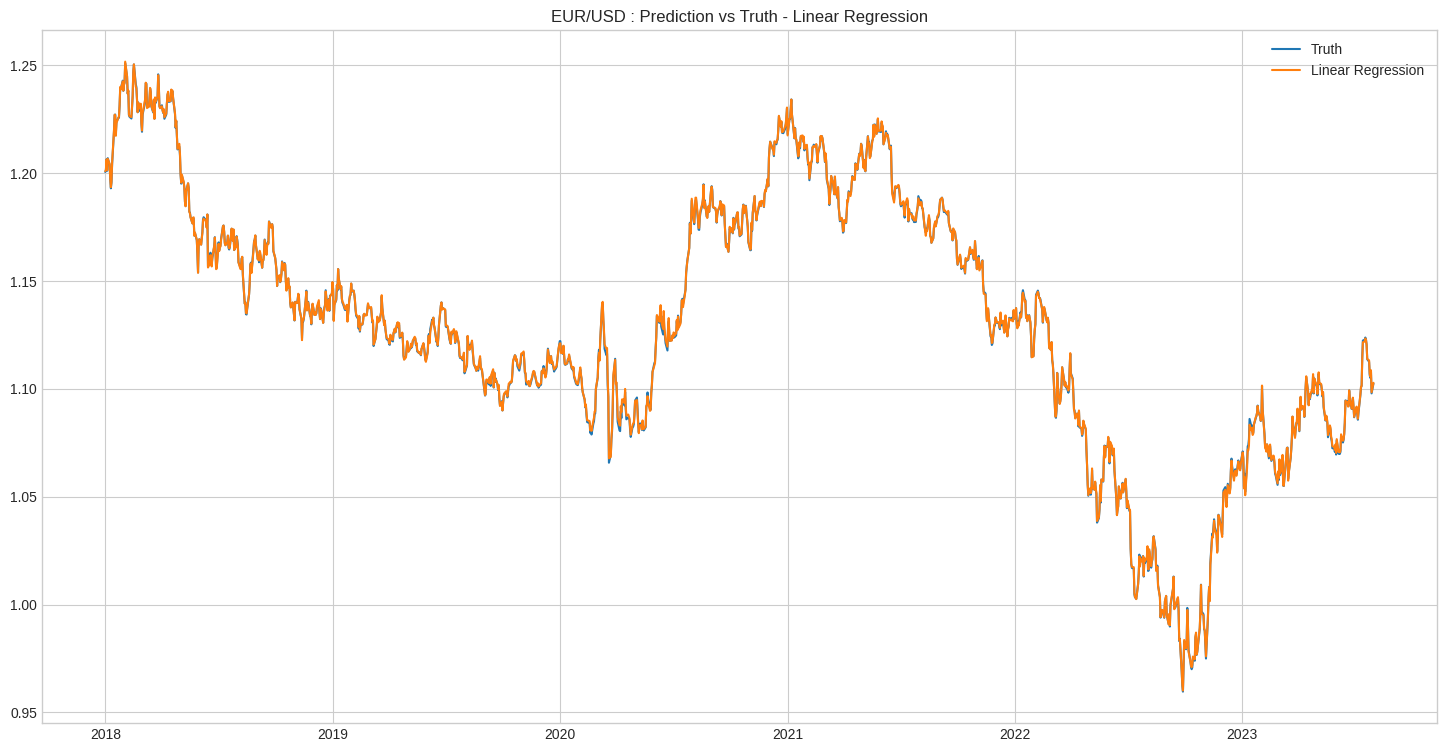

In [ ]:
dates = data_test.index.values
plt.figure(figsize = (18,9))
plt.style.use('seaborn-whitegrid')
plot_truth, = plt.plot(dates, y_test)
plot_lin, = plt.plot(dates, predictions_lin)
plt.legend([plot_truth, plot_lin], ['Truth', 'Linear Regression'])
plt.title('EUR/USD : Prediction vs Truth - Linear Regression')
plt.show()

SGD REGRESSOR (SGD)

In [ ]:
SGDRegressor?

In [ ]:
# First experiment with linear regression

# SGD is very sensitive to data with features at different scales. Hence we need to do feature scaling before training.
#search for the SGD-based linear regression with the optimal set of parameters.
from sklearn.linear_model import SGDRegressor

param_grid = {
    'penalty':['l1', 'l2', 'elasticnet'],
    "alpha": [1e-5, 3e-5, 1e-4],
    "eta0": [0.01, 0.03, 0.1],
}

sgd = SGDRegressor()
grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_scaled_train, y_train)

print(grid_search.best_params_)

sgd_best = grid_search.best_estimator_
#print(grid_search.best_score_)

predictions_sgd = sgd_best.predict(X_scaled_test)

#evaluating the predictions
print('RMSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_sgd)**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_sgd)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_sgd)))

{'alpha': 0.0001, 'eta0': 0.03, 'penalty': 'l1'}
RMSE: 0.004
MAE: 0.003
R^2: 0.996


<ipython-input-108-bfd40e08ab49>:7: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



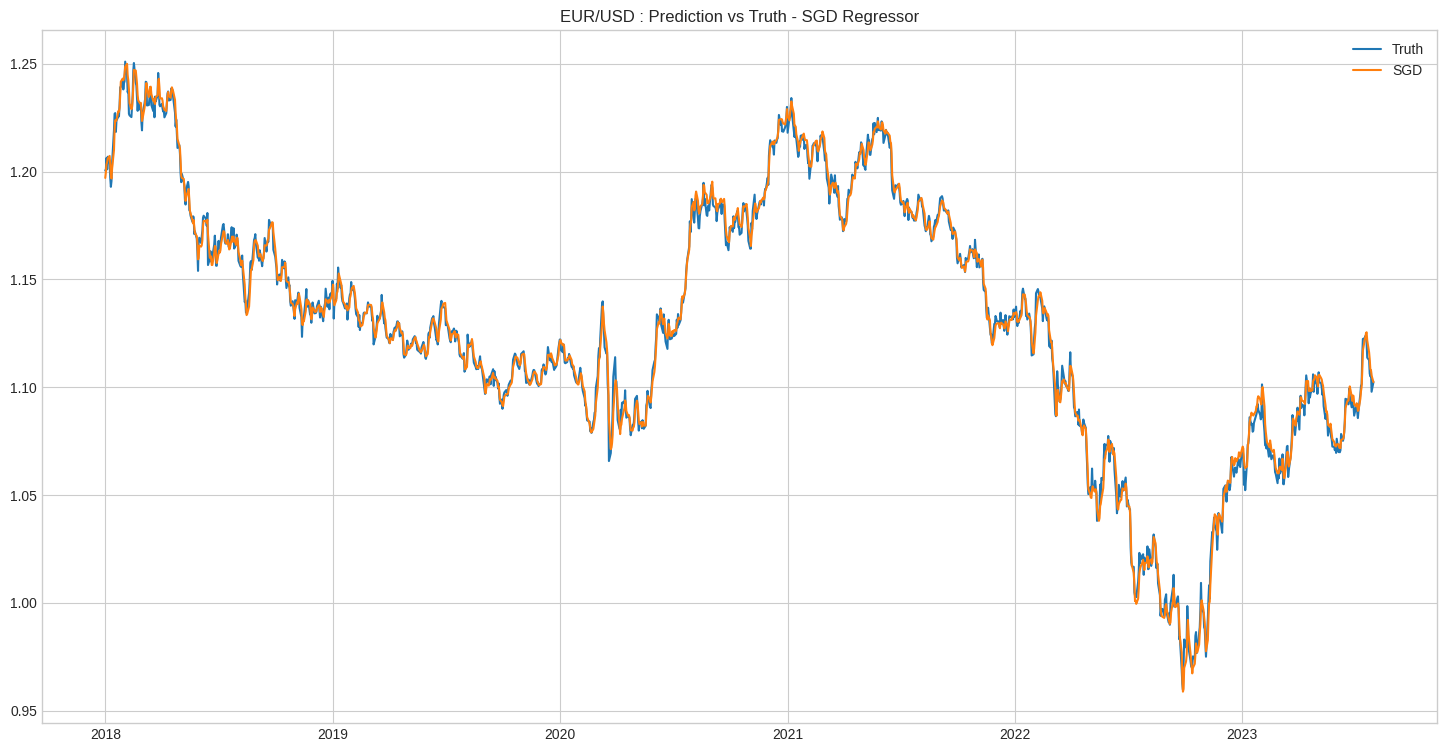

In [ ]:
dates = data_test.index.values
plt.figure(figsize = (18,9))
plot_truth, = plt.plot(dates, y_test)
plot_sgd, = plt.plot(dates, predictions_sgd)
plt.legend([plot_truth, plot_sgd], ['Truth', 'SGD'])
plt.title('EUR/USD : Prediction vs Truth - SGD Regressor')
plt.style.use('seaborn-whitegrid')
plt.show()

Extreme Gradient Boosting Regressor (XGB)

In [ ]:
XGBRegressor?

In [ ]:
xgb = XGBRegressor()

data_dmatrix = DMatrix(data=X_train,
                           label=y_train)

xgb_param_grid = {'learning_rate': [0.001, 0.01, 0.1, 1],
                  'n_estimators': [50, 100, 200, 300],
                  'subsample': [0.3, 0.5, 0.7, 1]}

grid_search = GridSearchCV(estimator=xgb,
                        param_grid=xgb_param_grid,
                        scoring='neg_mean_squared_error',
                        cv=4,
                        verbose=1,
                       n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ",grid_search.best_params_)

xgb_best = grid_search.best_estimator_

xgb_best.fit(X_train,y_train)
predictions_xgb = xgb_best.predict(X_test)

print('RMSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_xgb)**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_xgb)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_xgb)))

Fitting 4 folds for each of 64 candidates, totalling 256 fits
Best parameters found:  {'learning_rate': 0.1, 'n_estimators': 50, 'subsample': 1}
RMSE: 0.011
MAE: 0.006
R^2: 0.964


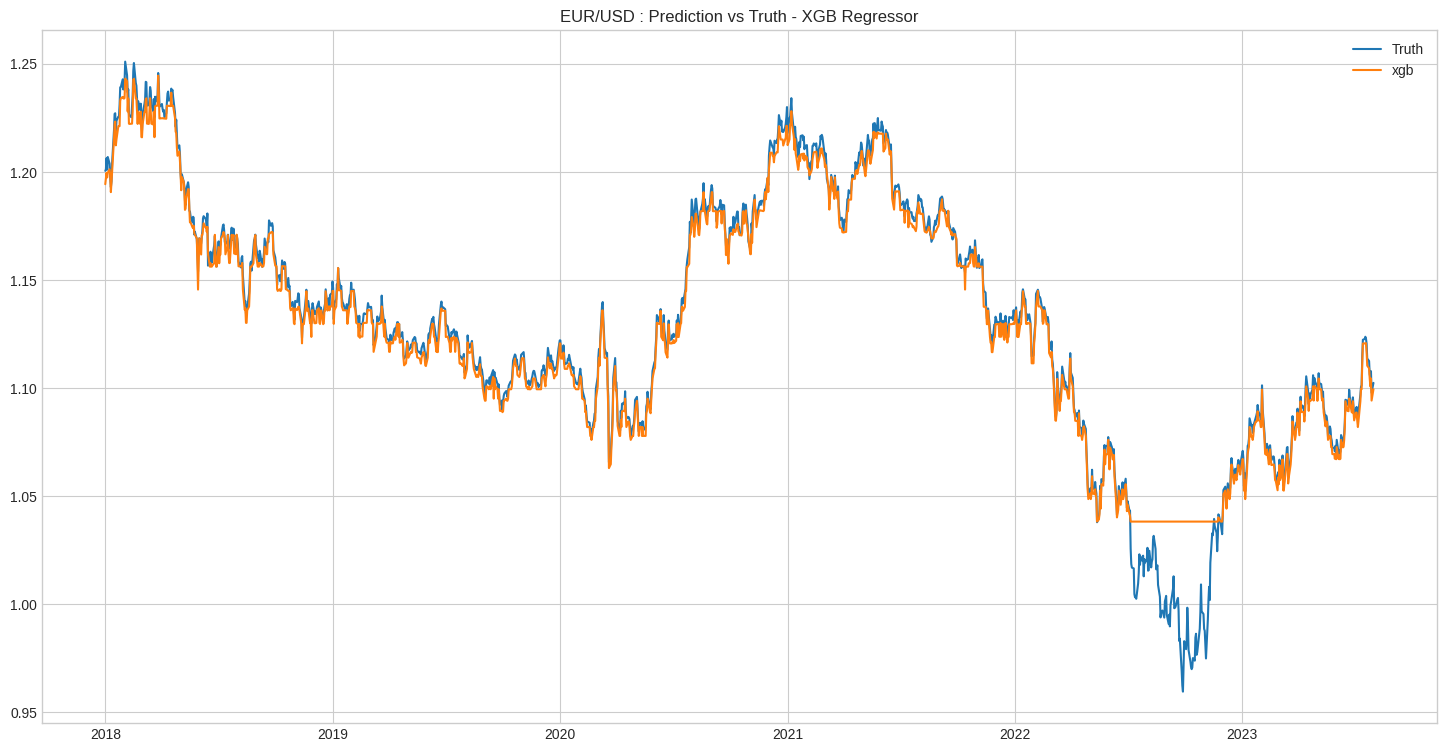

In [ ]:
dates = data_test.index.values
plt.figure(figsize = (18,9))
plot_truth, = plt.plot(dates, y_test)
plot_xgb, = plt.plot(dates, predictions_xgb)
plt.legend([plot_truth, plot_xgb], ['Truth', 'xgb'])
plt.title('EUR/USD : Prediction vs Truth - XGB Regressor')
plt.show()

Bagging Regressor (BGR)

In [ ]:
BaggingRegressor?

In [ ]:
bgr = BaggingRegressor(base_estimator=lin, n_estimators=100, oob_score=True, n_jobs=-1)

bgr.fit(X_scaled_train, y_train)
predictions_bgr = bgr.predict(X_scaled_test)

print('OOB: {0:.3f}'.format(bgr.oob_score))
print('RMSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_bgr)**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_bgr)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_bgr)))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



OOB: 1.000
RMSE: 0.001
MAE: 0.000
R^2: 1.000


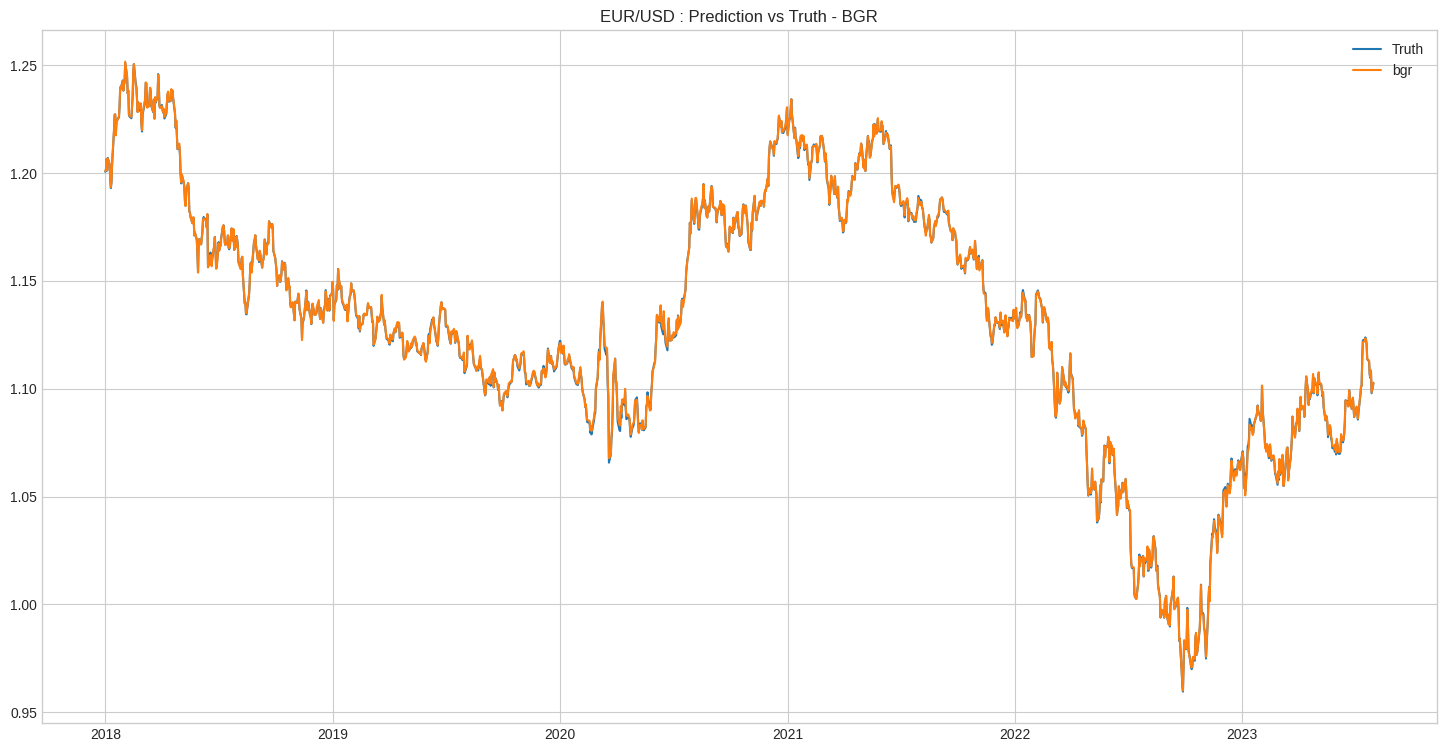

In [ ]:
dates = data_test.index.values
plt.figure(figsize = (18,9))
plot_truth, = plt.plot(dates, y_test)
plot_bgr, = plt.plot(dates, predictions_bgr)
plt.legend([plot_truth, plot_bgr], ['Truth', 'bgr'])
plt.title('EUR/USD : Prediction vs Truth - BGR')
plt.show()

Random Forest Regressor (RF)

In [ ]:
RandomForestRegressor?

In [ ]:
param_grid = {
    "max_depth": [30, 50],
    "min_samples_split": [5, 10, 20],

}

rf = RandomForestRegressor(n_estimators=100)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
# print(grid_search.best_score_)

rf_best = grid_search.best_estimator_
predictions_rf = rf_best.predict(X_test)

print('RMSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_rf)**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_rf)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_rf)))


{'max_depth': 50, 'min_samples_split': 10}
RMSE: 0.012
MAE: 0.004
R^2: 0.959


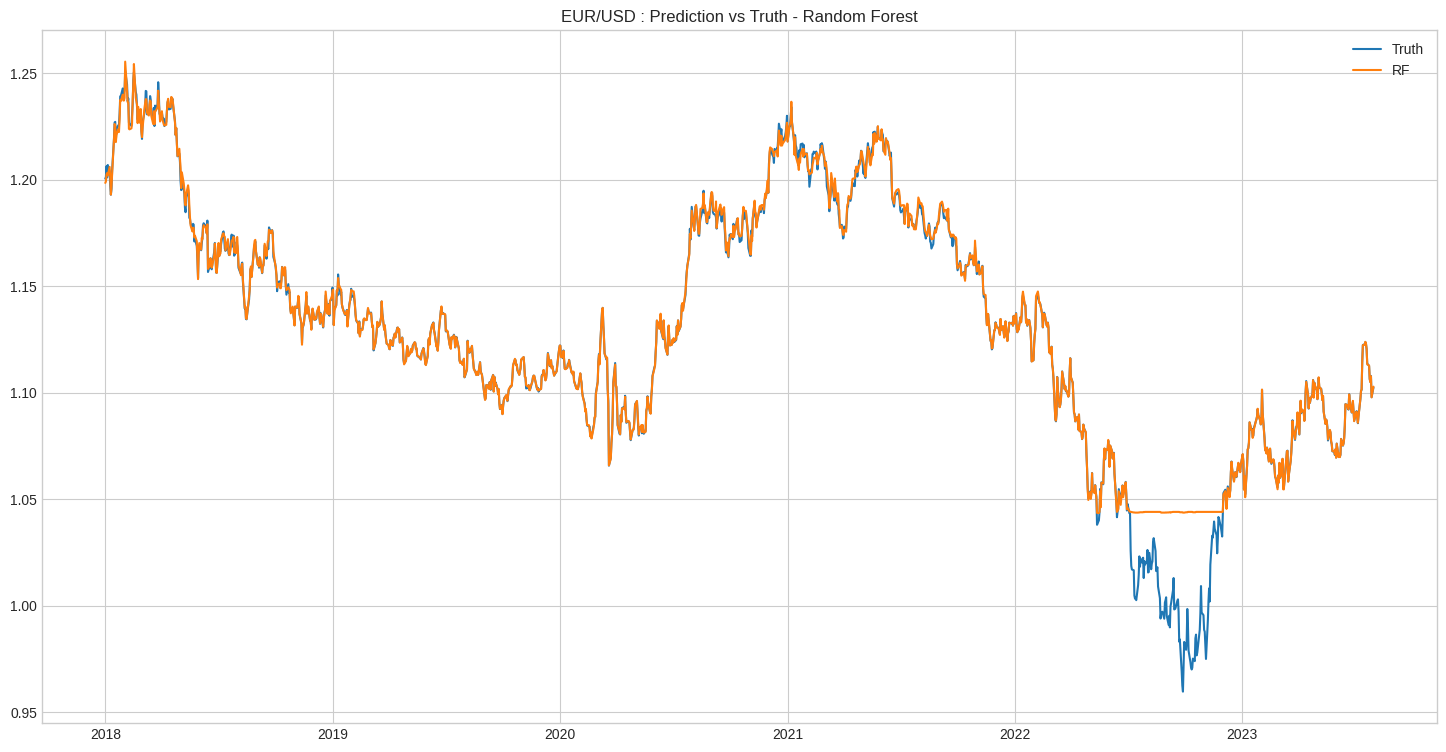

In [ ]:
dates = data_test.index.values
plt.figure(figsize = (18,9))
plot_truth, = plt.plot(dates, y_test)
plot_rf, = plt.plot(dates, predictions_rf)
plt.legend([plot_truth, plot_rf], ['Truth', 'RF'])
plt.title('EUR/USD : Prediction vs Truth - Random Forest')
plt.show()

LSTM

In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_scaled_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
LSTM?

In [ ]:
hist = model.fit(X_scaled_train, y_train, epochs = 20, batch_size = 32, verbose=2, callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

Epoch 1/20


107/107 - 26s - loss: 0.1024 - 26s/epoch - 241ms/step
Epoch 2/20


107/107 - 15s - loss: 0.0076 - 15s/epoch - 136ms/step
Epoch 3/20


107/107 - 15s - loss: 0.0069 - 15s/epoch - 136ms/step
Epoch 4/20


107/107 - 18s - loss: 0.0061 - 18s/epoch - 170ms/step
Epoch 5/20


107/107 - 15s - loss: 0.0065 - 15s/epoch - 144ms/step
Epoch 6/20


107/107 - 15s - loss: 0.0061 - 15s/epoch - 137ms/step
Epoch 7/20


107/107 - 15s - loss: 0.0059 - 15s/epoch - 136ms/step
Epoch 8/20


107/107 - 14s - loss: 0.0062 - 14s/epoch - 135ms/step
Epoch 9/20


107/107 - 14s - loss: 0.0053 - 14s/epoch - 135ms/step
Epoch 10/20


107/107 - 14s - loss: 0.0055 - 14s/epoch - 135ms/step
Epoch 11/20


107/107 - 15s - loss: 0.0052 - 15s/epoch - 142ms/step
Epoch 12/20


107/107 - 14s - loss: 0.0051 - 14s/epoch - 135ms/step
Epoch 13/20


107/107 - 15s - loss: 0.0051 - 15s/epoch - 141ms/step
Epoch 14/20


107/107 - 15s - loss: 0.0049 - 15s/epoch - 142ms/step
Epoch 15/20


107/107 - 14s - loss: 0.0047 - 14s/epoch - 135ms/step
Epoch 16/20


107/107 - 14s - loss: 0.0047 - 14s/epoch - 135ms/step
Epoch 17/20


107/107 - 14s - loss: 0.0044 - 14s/epoch - 135ms/step
Epoch 18/20


107/107 - 15s - loss: 0.0044 - 15s/epoch - 142ms/step
Epoch 19/20


107/107 - 15s - loss: 0.0046 - 15s/epoch - 144ms/step
Epoch 20/20


107/107 - 15s - loss: 0.0040 - 15s/epoch - 136ms/step


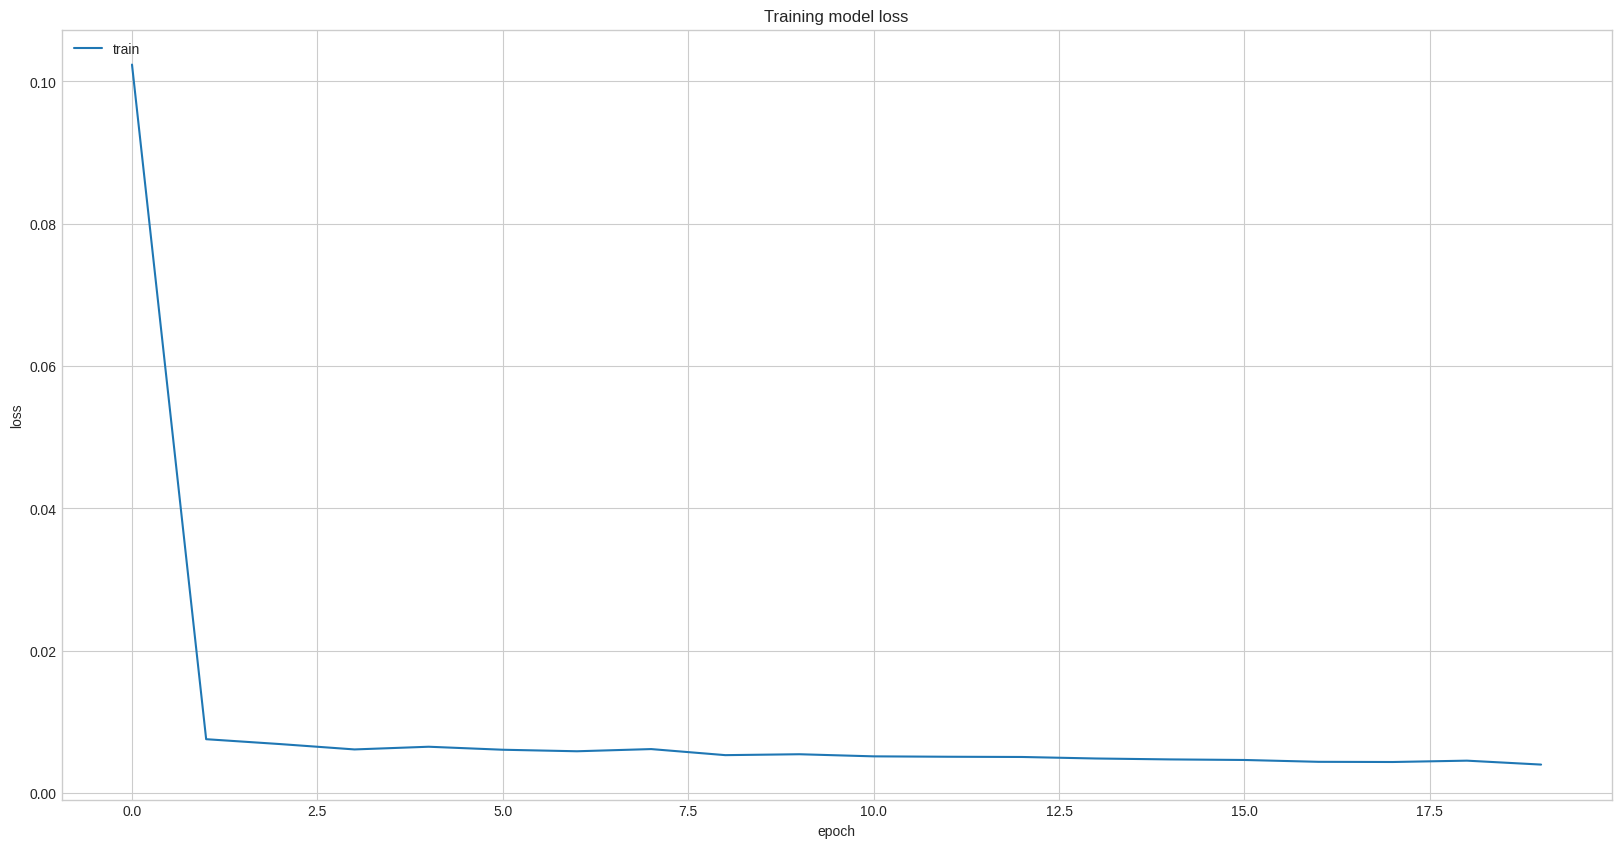

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
predictions_lstm = model.predict(X_scaled_test)


46/46 [==============================] - 5s 45ms/step


In [ ]:
print('RMSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_lstm)**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_lstm)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_lstm)))


RMSE: 0.030
MAE: 0.024
R^2: 0.748


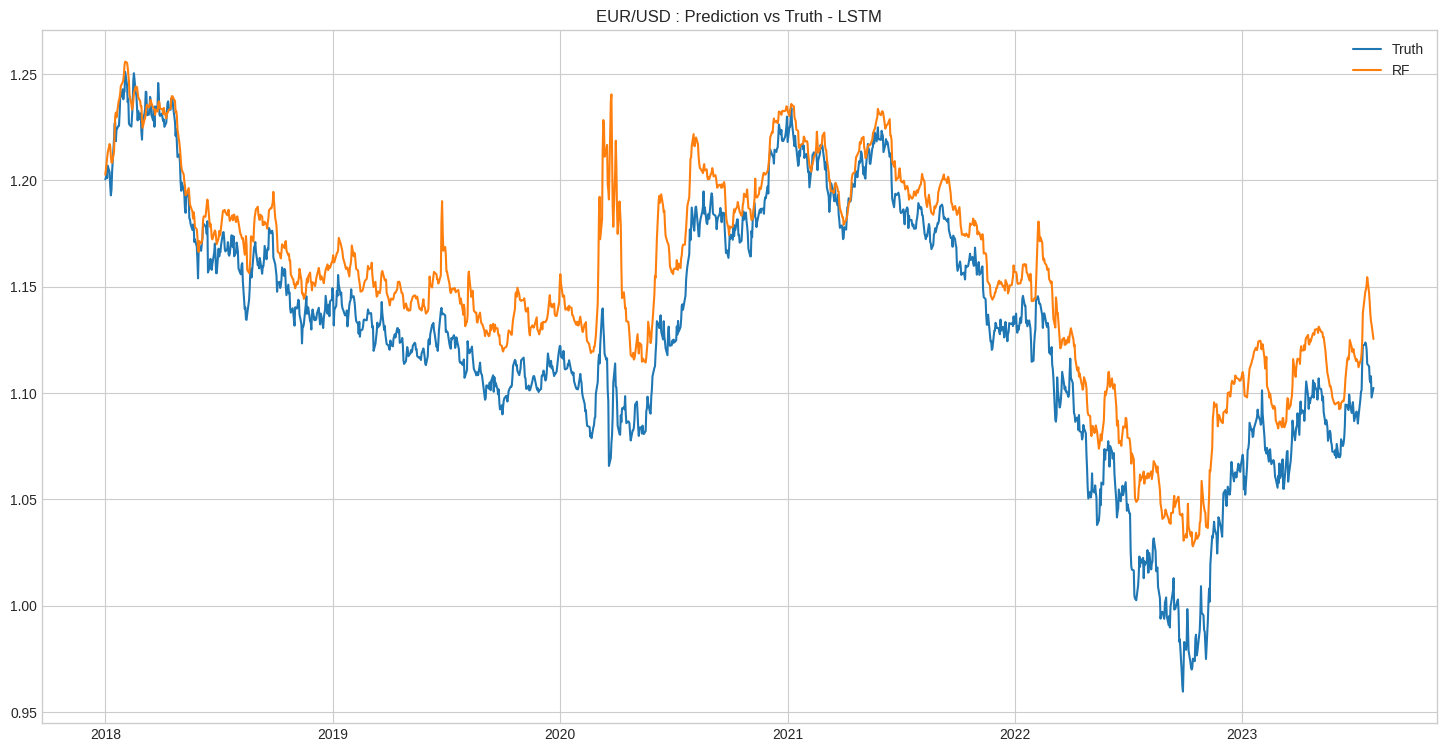

In [ ]:
dates = data_test.index.values
plt.figure(figsize = (18,9))
plot_truth, = plt.plot(dates, y_test)
plot_lstm, = plt.plot(dates, predictions_lstm)
plt.legend([plot_truth, plot_lstm], ['Truth', 'RF'])
plt.title('EUR/USD : Prediction vs Truth - LSTM')
plt.show()

The model with the least mean_absolute_error:
 BGR    0.00047
dtype: float64


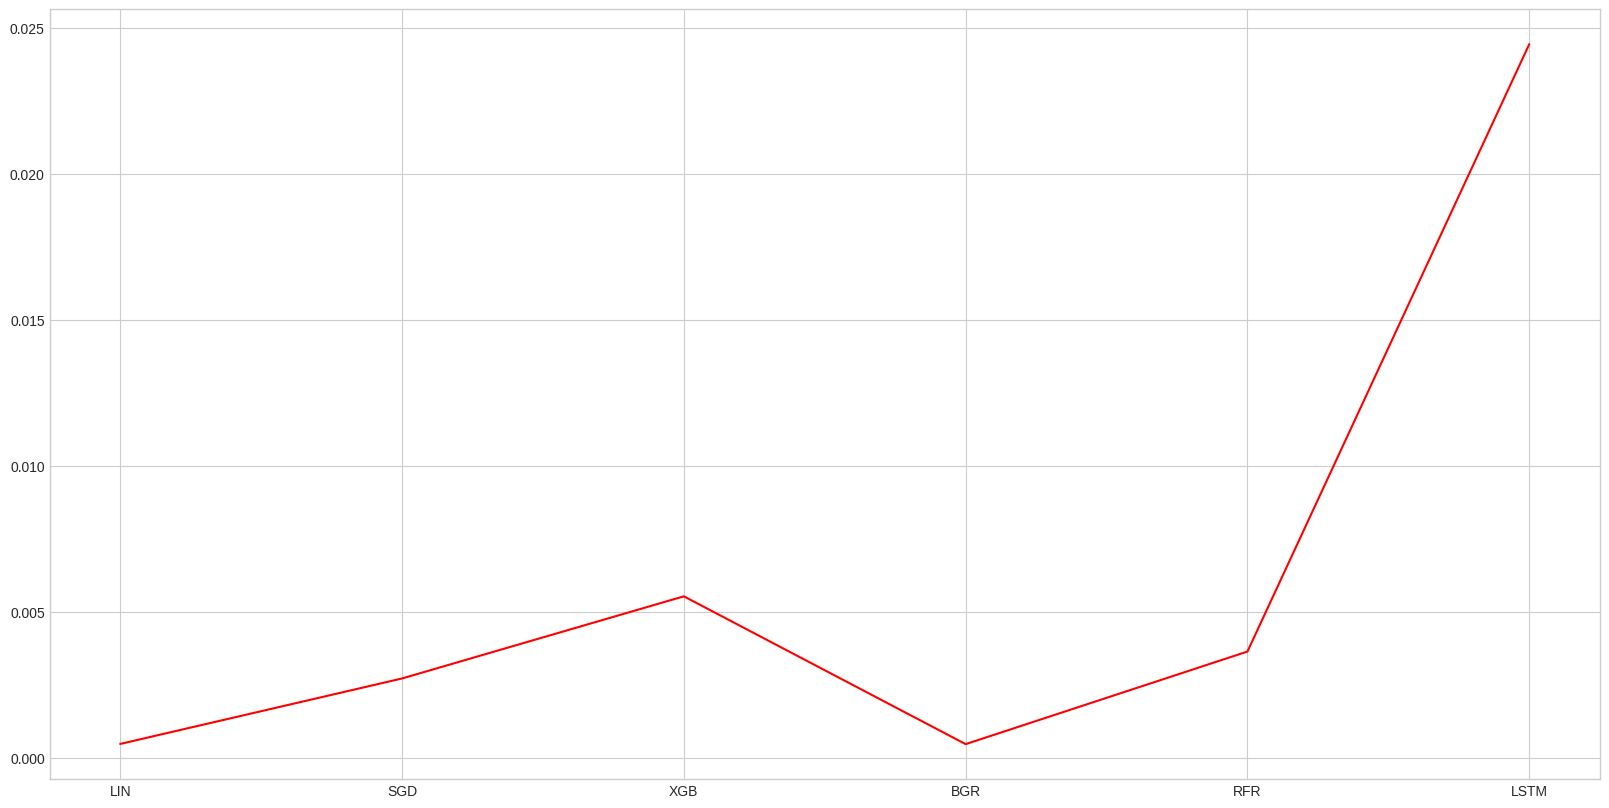

In [ ]:
mae_scoring = pd.Series({'LIN':mean_absolute_error(y_test, predictions_lin),
                'SGD':mean_absolute_error(y_test, predictions_sgd),
                'XGB':mean_absolute_error(y_test, predictions_xgb),
                'BGR':mean_absolute_error(y_test, predictions_bgr),
                'RFR':mean_absolute_error(y_test, predictions_rf),
                'LSTM':mean_absolute_error(y_test, predictions_lstm)})

#filtering the regressor with the least mean_absolute_error value
filter = mae_scoring.min()
mae_min = mae_scoring[mae_scoring == mae_scoring.min()]
print('The model with the least mean_absolute_error:\n',mae_min)

plt.plot(mae_scoring, 'r')

Saving, Loading and Predicting with the BGR Model

In [ ]:
#saving the BGR model with sklearn:joblib
joblib.dump(bgr, 'bgr_eurusd_10062019.pkl')

['bgr_eurusd_10062019.pkl']

In [ ]:
#loading the saved model
model = joblib.load('bgr_eurusd_10062019.pkl')

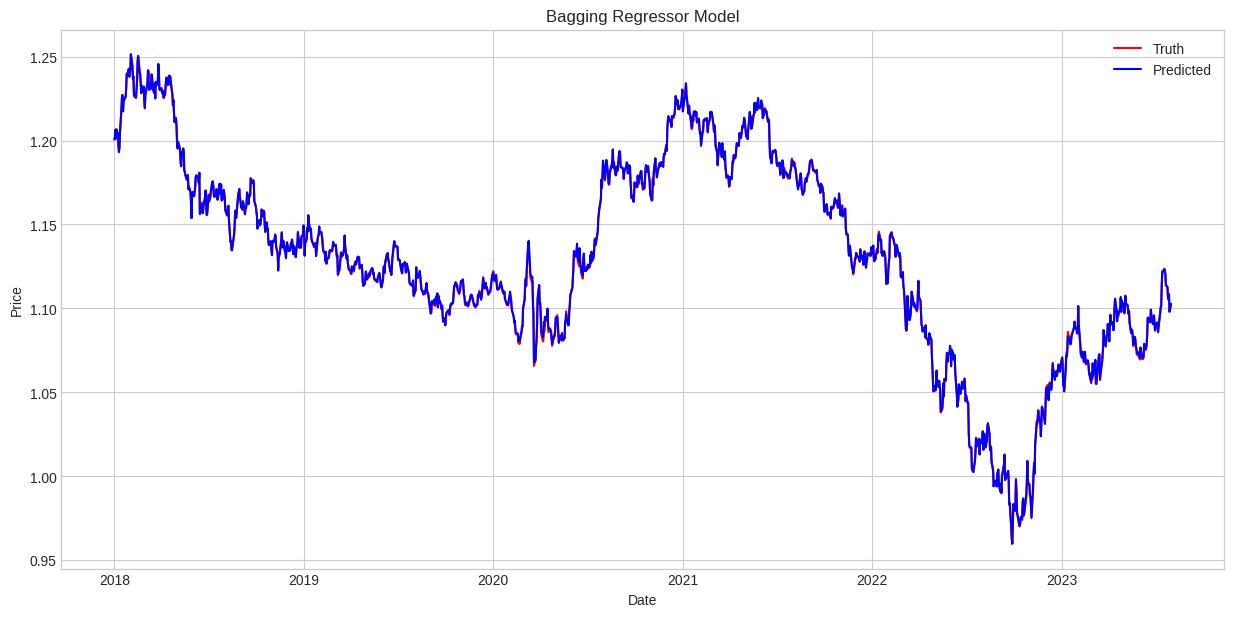

In [ ]:
#Visualizing the predictions and truth values
pred = model.predict(X_scaled_test)
plt.figure(figsize=(15,7))
plt.plot(y_test, 'r', label='Truth')
plt.plot(y_test.index, pred, 'b', label='Predicted')
plt.title("Bagging Regressor Model")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

<ipython-input-126-3d392372e0e2>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



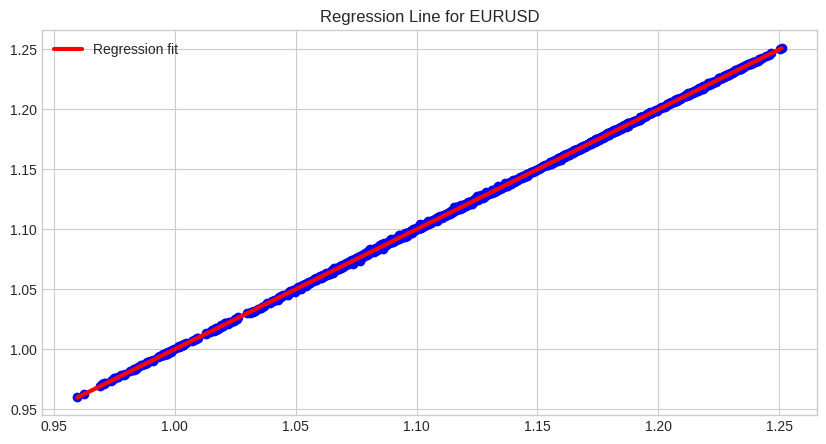

In [ ]:
#plotting regression line
plt.style.use('seaborn-whitegrid')
plt.scatter(y_test, pred,color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=3, label='Regression fit')
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title("Regression Line for EURUSD")
plt.legend()
plt.show()

In [ ]:
stock=data
stock = stock.groupby('Date')['Close'].sum().reset_index()

In [ ]:
stock = stock.set_index('Date')
stock.index

DatetimeIndex(['2004-11-19', '2004-11-22', '2004-11-23', '2004-11-24',
               '2004-11-25', '2004-11-26', '2004-11-29', '2004-11-30',
               '2004-12-01', '2004-12-02',
               ...
               '2023-07-18', '2023-07-19', '2023-07-20', '2023-07-21',
               '2023-07-24', '2023-07-25', '2023-07-26', '2023-07-27',
               '2023-07-28', '2023-07-31'],
              dtype='datetime64[ns]', name='Date', length=4849, freq=None)

In [ ]:
#y = stock['Close'].resample('M').mean()
stock.index = pd.to_datetime(stock.index)

monthly_mean = stock.Close.resample('M').mean()

In [ ]:
monthly_mean['2004':]

Date
2004-11-30    1.318378
2004-12-31    1.341661
2005-01-31    1.311090
2005-02-28    1.301560
2005-03-31    1.318016
                ...   
2023-03-31    1.070565
2023-04-30    1.095870
2023-05-31    1.087885
2023-06-30    1.083834
2023-07-31    1.105559
Freq: M, Name: Close, Length: 225, dtype: float64

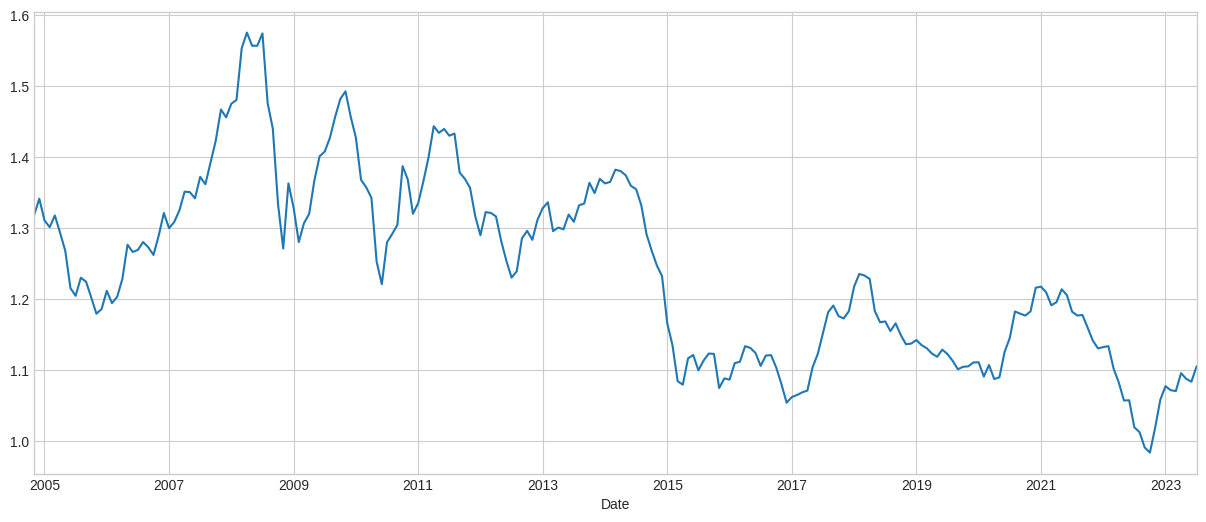

In [ ]:
monthly_mean.plot(figsize=(15, 6))
plt.show()

In [ ]:
# Get the last 10 data points from the observed data to use as input for forecasting
forecast_input = monthly_mean.iloc[-10:].values.reshape(1, -1)

In [ ]:
# Create a function to perform forecasting using the BaggingRegressor
def forecast_next_n_steps(model, input_data, n_steps):
    forecasts = []
    for _ in range(n_steps):
        next_step_forecast = model.predict(input_data)
        forecasts.append(next_step_forecast[0])
        # Update the input_data by removing the first element and appending the new forecast
        input_data = np.append(input_data[:, 1:], next_step_forecast)
        input_data = input_data.reshape(1, -1)
    return forecasts

In [ ]:
# Use the function to forecast the next 25 steps (adjust the value as needed)
n_steps_forecast = 25
forecasts = forecast_next_n_steps(model, forecast_input, n_steps_forecast)


ValueError: ignored